In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np 
from scipy import ndimage
from skimage.measure import label

In [28]:
## matplotlib parameters to make my life easier
params={     
    'axes.labelsize'  : '16',   
    'axes.titlesize'  : '16',  
    'xtick.labelsize' :'16',
    'ytick.labelsize' :'16',    
    'lines.linewidth' : '2' ,   
    'legend.fontsize' : '12', 
    'figure.figsize'   : '9, 7'    
}
plt.rcParams.update(params)

In [2]:
ds_prcp = xr.open_dataset(f"/scratch/nf33/hk25_LSP/UK/MC/pr_hourly.nc")


In [3]:
prf = np.zeros(ds_prcp.time.shape[0])

In [4]:
pr_th = 0.5488934655786771

In [6]:
tot = ds_prcp.longitude.shape[0] * ds_prcp.latitude.shape[0]

In [8]:
for its in range(0,ds_prcp.time.shape[0]):
    prcp = ds_prcp["pr"].isel(time=its)*3600
    cvt_pr = len(np.argwhere(prcp.values>pr_th))
    prf[its] = cvt_pr/tot
    

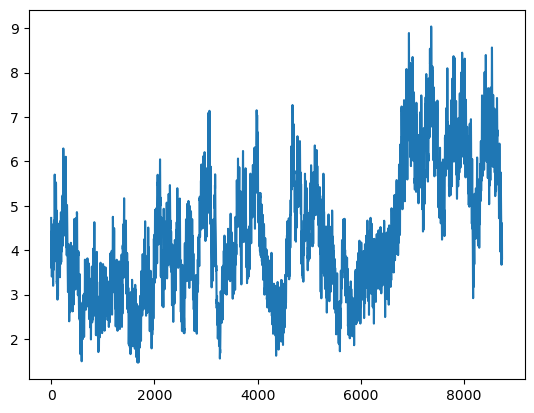

In [11]:
plt.plot(prf*100)


In [13]:
prcp = ds_prcp["pr"].isel(time=0)
ds_ts = xr.open_dataset("/scratch/nf33/hk25_LSP/UK/MC_chunk/number_size_prth_0.5_hourly.nc")
caf = ds_ts["area_frac"].isel(time=0)

(100.0, 149.0)

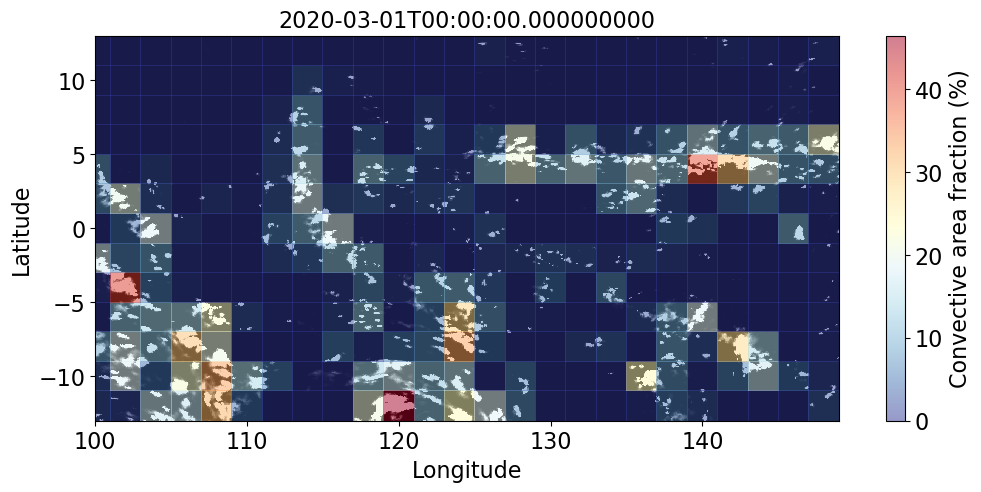

In [29]:
plt.figure(figsize=(12,5))
plt.pcolor(ds_prcp.longitude, ds_prcp.latitude, prcp,vmax = 0.00014,cmap="gray")
plt.pcolor(ds_ts.longitude, ds_ts.latitude,caf*100,alpha=0.5,cmap="RdYlBu_r")
plt.colorbar(label="Convective area fraction (%)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(str(ds_prcp.time.isel(time=0).values))
plt.xlim([100,149])